<h1> Section 3: Analyzing Juvenile Crime in NYC Schools </h1>

<h2> Building & Merging Education Data Set for Academic Year 2013/14 with Crime Data </h2>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

demographics_full = pd.read_csv('13-18_DemographicSnapshot.csv')
crimeData = pd.read_csv('10-16_SchoolSafety.csv')
mergedData = pd.read_csv('use_this.csv', index_col=0)


In [0]:
#Viewing/testing merged data
mergedData.head

<bound method NDFrame.head of       DBN   AY12-13   AY13-14 Economic Need Index Percent Asian Percent White  \
0    M292   2357841   2276174               83.2%         13.2%          3.9%   
1    M448   2190592   1967439               81.2%         29.9%          3.3%   
2    M450   3745068   3700670               61.0%          9.4%          8.3%   
3    M509   2198272   2302771               76.7%          5.8%          2.5%   
4    M539   6808136   7034224               25.7%         38.5%         28.6%   
5    M696   3155058   3247592               31.4%         17.1%         45.3%   
6    M135         0    911543               71.3%          5.7%          2.6%   
7    M139         0    933883               71.4%          3.6%          8.8%   
8    M288   2607632   2672246               68.7%          4.7%          3.0%   
9    M294   1944793   2011826               63.3%          5.9%         11.7%   
10   M296   2089291   2083836               75.1%          5.0%          1.7%  

In [0]:
mergedData.columns

Index(['DBN', 'AY12-13', 'AY13-14', 'Economic Need Index', 'Percent Asian',
       'Percent White', 'Percent Hispanic', 'Percent Black',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Supportive Environment - Percent Positive',
       'Percent English Language Learners',
       'Percent Students with Disabilities', 'Latitude', 'Longitude',
       'AvgOfNoCrim N', 'Total Grads', 'Dropout', 'Still Enrolled',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested'],
      dtype='object')

In [0]:
#checking columns of crime data
crimeData.columns

Index(['School Year', 'Building Code', 'DBN', 'Location Name', 'Location Code',
       'Address', 'Borough', 'Geographical District Code', 'Register',
       'Building Name', '# Schools', 'Schools in Building', 'Major N', 'Oth N',
       'NoCrim N', 'Prop N', 'Vio N', 'ENGroupA', 'RangeA', 'AvgOfMajor N',
       'AvgOfOth N', 'AvgOfNoCrim N', 'AvgOfProp N', 'AvgOfVio N',
       'Borough Name', 'Postcode', 'Latitude', 'Longitude', 'Community Board',
       'Council District ', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [0]:
crimeData.head

<bound method NDFrame.head of      School Year Building Code           DBN  \
0        2015-16          K006        17K006   
1        2015-16          K005        16K005   
2        2015-16          K003        13K003   
3        2015-16          K002           NaN   
4        2015-16          K002        75K141   
5        2015-16          K002        84K704   
6        2015-16          K002        17K002   
7        2015-16          X953        75XHOS   
8        2015-16          K001        15K001   
9        2015-16          K008        13K008   
10       2015-16          K095        21K095   
11       2015-16          K165        23K165   
12       2015-16          Q849        24Q077   
13       2015-16          K857        75K036   
14       2015-16          X953        75M401   
15       2015-16          X953        75KHOS   
16       2015-16          X905        10X696   
17       2015-16          X886        10X307   
18       2015-16          X884           NaN   
19       2

<h3>Building Crime Specific Data Set with Added Fields from Crime Dataset</h3>

In [0]:
#preserving rows only for 2013-2014 school year from original crime data set
crimeData = crimeData[crimeData['School Year'] == '2013-14']

In [0]:
#checking dataset for only 2013/14 values
crimeData.columns

Index(['School Year', 'Building Code', 'DBN', 'Location Name', 'Location Code',
       'Address', 'Borough', 'Geographical District Code', 'Register',
       'Building Name', '# Schools', 'Schools in Building', 'Major N', 'Oth N',
       'NoCrim N', 'Prop N', 'Vio N', 'ENGroupA', 'RangeA', 'AvgOfMajor N',
       'AvgOfOth N', 'AvgOfNoCrim N', 'AvgOfProp N', 'AvgOfVio N',
       'Borough Name', 'Postcode', 'Latitude', 'Longitude', 'Community Board',
       'Council District ', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [0]:
#Merging Crime Data from 2013-14 with additional merged data
mergedCrimeData = pd.merge(mergedData, crimeData, left_on = "DBN", right_on = 'Location Code')

In [0]:
mergedCrimeData = mergedCrimeData.drop(columns = ['AY12-13','AY13-14','School Year','Building Code', 'DBN_y', 'Location Code',
                                'Address','Geographical District Code','Register','Building Name', '# Schools',
                               'Schools in Building', 'Postcode', 'Community Board', 'Council District ', 
                                'Census Tract', 'BIN', 'BBL', 'NTA'])

<h3> Visualizing Crimes by Location and Borough </h3>

In [0]:
mergedCrimeData.shape

(411, 38)

In [0]:
mergedCrimeData.columns

Index(['DBN_x', 'Economic Need Index', 'Percent Asian', 'Percent White',
       'Percent Hispanic', 'Percent Black', 'Student Attendance Rate',
       'Percent of Students Chronically Absent',
       'Supportive Environment - Percent Positive',
       'Percent English Language Learners',
       'Percent Students with Disabilities', 'Latitude_x', 'Longitude_x',
       'AvgOfNoCrim N_x', 'Total Grads', 'Dropout', 'Still Enrolled',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Location Name',
       'Borough', 'Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N',
       'ENGroupA', 'RangeA', 'AvgOfMajor N', 'AvgOfOth N', 'AvgOfNoCrim N_y',
       'AvgOfProp N', 'AvgOfVio N', 'Borough Name', 'Latitude_y',
       'Longitude_y'],
      dtype='object')

In [0]:
mergedCrimeData['Borough Name'].unique()

array(['MANHATTAN', nan, 'BRONX    ', 'BROOKLYN ', 'QUEENS   ',
       'STATEN IS'], dtype=object)

In [0]:
manhattanMajorCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'MANHATTAN', 'Major N'].sum()
siMajorCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'STATEN IS', 'Major N'].sum()
brookMajorCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'BROOKLYN ', 'Major N'].sum()
queensMajorCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'QUEENS   ', 'Major N'].sum()
bronxMajorCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'BRONX    ', 'Major N'].sum()

manhattanViolentCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'MANHATTAN', 'Vio N'].sum()
siViolentCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'STATEN IS', 'Vio N'].sum()
brookViolentCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'BROOKLYN ', 'Vio N'].sum()
queensViolentCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'QUEENS   ', 'Vio N'].sum()
bronxViolentCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'BRONX    ', 'Vio N'].sum()

<h3>Plotting Major Crimes by Borough</h3>

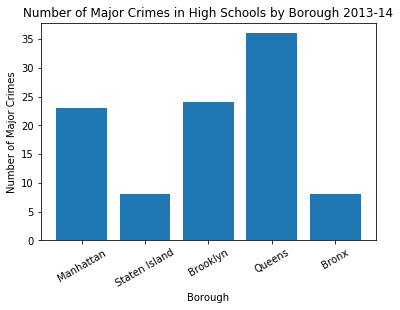

In [0]:
import matplotlib.pyplot as plt

label = ['Manhattan', 'Staten Island', 'Brooklyn', 'Queens', 'Bronx']
counts = [manhattanMajorCrimes, siMajorCrimes, brookMajorCrimes, queensMajorCrimes, bronxMajorCrimes]
index = np.arange(len(label))

# this is for plotting purpose
plt.bar(index, counts)
plt.xlabel('Borough', fontsize=10)
plt.ylabel('Number of Major Crimes', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Number of Major Crimes in High Schools by Borough 2013-14')
plt.show()

<h3>Plotting Violent Crimes by Borough</h3>

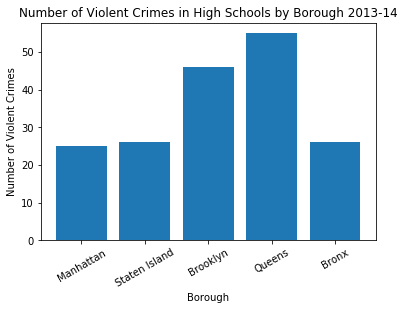

In [0]:
label = ['Manhattan', 'Staten Island', 'Brooklyn', 'Queens', 'Bronx']
counts = [manhattanViolentCrimes, siViolentCrimes, brookViolentCrimes, queensViolentCrimes, bronxViolentCrimes]
index = np.arange(len(label))

# this is for plotting purpose
plt.bar(index, counts)
plt.xlabel('Borough', fontsize=10)
plt.ylabel('Number of Violent Crimes', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Number of Violent Crimes in High Schools by Borough 2013-14')
plt.show()

<h3>Plotting Total Crimes and # of Crimes Per School by Borough</h3>

In [0]:
#Creating new column for total crimes i.e. total of all the different types of crimes
mergedCrimeData['TotalCrimes'] = mergedCrimeData['Major N'] + mergedCrimeData['Vio N'] + mergedCrimeData['Oth N']
+ mergedCrimeData['NoCrim N'] + mergedCrimeData['Prop N']

0       NaN
1       3.0
2       3.0
3       NaN
4       6.0
5       0.0
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      2.0
26      NaN
27      3.0
28      NaN
29      1.0
       ... 
381     NaN
382     NaN
383     NaN
384     0.0
385     NaN
386    16.0
387    16.0
388     0.0
389    10.0
390     5.0
391     2.0
392     0.0
393     NaN
394     NaN
395     8.0
396     NaN
397    43.0
398    52.0
399     NaN
400    45.0
401    16.0
402     0.0
403     NaN
404     NaN
405     NaN
406     3.0
407     NaN
408     NaN
409     1.0
410     0.0
Length: 411, dtype: float64

In [0]:
manhattanCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'MANHATTAN', 'TotalCrimes'].sum()
siCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'STATEN IS', 'TotalCrimes'].sum()
brookCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'BROOKLYN ', 'TotalCrimes'].sum()
queensCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'QUEENS   ', 'TotalCrimes'].sum()
bronxCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'BRONX    ', 'TotalCrimes'].sum()

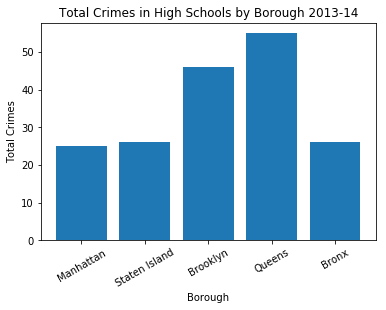

In [0]:
label = ['Manhattan', 'Staten Island', 'Brooklyn', 'Queens', 'Bronx']
counts = [manhattanViolentCrimes, siViolentCrimes, brookViolentCrimes, queensViolentCrimes, bronxViolentCrimes]
index = np.arange(len(label))

# this is for plotting purpose
plt.bar(index, counts)
plt.xlabel('Borough', fontsize=10)
plt.ylabel('Total Crimes', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Total Crimes in High Schools by Borough 2013-14')
plt.show()

In [0]:
#average number of crimes by borough
mSchools = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'MANHATTAN', 'Borough Name'].count()
siSchools = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'STATEN IS', 'Borough Name'].count()
brookSchools = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'BROOKLYN ', 'Borough Name'].count()
queensSchools = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'QUEENS   ', 'Borough Name'].count()
bronxSchools = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'BRONX    ', 'Borough Name'].count()

manhattanCrimes = (mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'MANHATTAN', 'TotalCrimes'].sum())
siCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'STATEN IS', 'TotalCrimes'].sum()
brookCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'BROOKLYN ', 'TotalCrimes'].sum()
queensCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'QUEENS   ', 'TotalCrimes'].sum()
bronxCrimes = mergedCrimeData.loc[mergedCrimeData['Borough Name'] == 'BRONX    ', 'TotalCrimes'].sum()

print (mSchools)
print (siSchools)
print (brookSchools)
print (queensSchools)
print (bronxSchools)

97
10
113
78
112


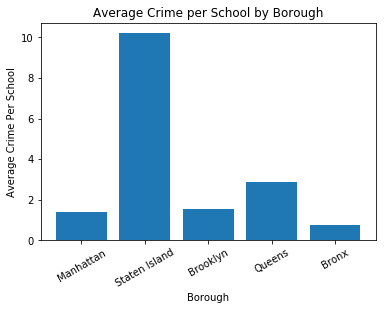

In [0]:
label = ['Manhattan', 'Staten Island', 'Brooklyn', 'Queens', 'Bronx']
counts = [(manhattanCrimes/mSchools), (siCrimes/siSchools), (brookCrimes/brookSchools), 
          (queensCrimes/queensSchools), (bronxCrimes/bronxSchools)]
index = np.arange(len(label))

# this is for plotting purpose
plt.bar(index, counts)
plt.xlabel('Borough', fontsize=10)
plt.ylabel('Average Crime Per School', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Average Crime per School by Borough')
plt.show()

<h2>Building 2-Dimensional Scatter Plots to Depict Relationships between Variables of Schools</h2>

<h3>Plotting Total Crimes vs Positive Supportive Environment Score</h3>

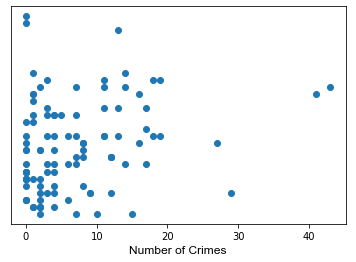

In [0]:
import matplotlib.pyplot as plt

axis_font = {'fontname':'Arial', 'size':'12'}

plt.scatter(mergedCrimeData['TotalCrimes'], mergedCrimeData['Supportive Environment - Percent Positive'])
plt.xlabel("Number of Crimes", **axis_font)
plt.ylabel("% of Students Recording Positive Environment", **axis_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

<h3>Plotting Total Crimes vs Drop Out Rates </h3>

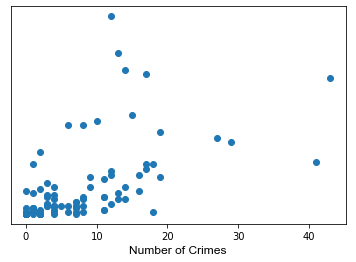

In [0]:
plt.scatter(mergedCrimeData['TotalCrimes'], mergedCrimeData['Dropout'])
plt.xlabel("Number of Crimes", **axis_font)
plt.ylabel("% of Students Recording Positive Environment", **axis_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

<h3> Plotting Total Crimes vs % of Students Chronically Absent </h3>

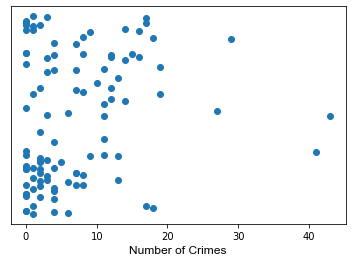

In [0]:
plt.scatter(mergedCrimeData['TotalCrimes'], mergedCrimeData['Percent of Students Chronically Absent'])
plt.xlabel("Number of Crimes", **axis_font)
plt.ylabel("% of Students Recording Positive Environment", **axis_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

<h3>Using Folium to Plot High School Crimes by Location</h3>

In [0]:
import folium
from folium import plugins

In [0]:
m = folium.Map([40.7136, -73.9863], zoom_start=11)
m2 = folium.Map([40.7136, -73.9863], zoom_start=11)
m3 = folium.Map([40.7136, -73.9863], zoom_start=11)
m

In [0]:
# drop rows as 
mergedCrimeData = mergedCrimeData.dropna(subset=['Latitude_y', 'Longitude_y', 'DBN_x'])
# mergedCrimeData = mergedCrimeData.drop(columns = [
#                                               'ENGroupA','RangeA', 'AvgOfNoCrim N_y', 'AvgOfMajor N',
#                                               'AvgOfOth N', 'AvgOfProp N', 'AvgOfVio N'])
mergedCrimeData = mergedCrimeData.fillna(0)
schoolsWithCrime = mergedCrimeData[mergedCrimeData['TotalCrimes'] !=0]
schoolsWithViolentCrime = mergedCrimeData[mergedCrimeData['Vio N'] !=0]
schoolsWithMajorCrimes = mergedCrimeData[mergedCrimeData['Major N'] !=0]


In [0]:
schoolsWithCrime.shape

(83, 39)

In [0]:
schoolsWithViolentCrime.shape

(57, 39)

In [0]:
schoolsWithMajorCrimes.shape

(42, 39)

<h3> Plotting All Crimes in High Schools on Heat Map </h3>

In [0]:
# mark each crime location as a point
for index, row in schoolsWithCrime.iterrows():
    folium.CircleMarker([row['Latitude_y'], row['Longitude_y']],
                        radius=15,
                        popup=row['DBN_x'],
                        fill_color="#2227e4", # divvy color
                       ).add_to(m)

stationArr = schoolsWithCrime[['Latitude_y', 'Longitude_y']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/anirbanpoddar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/anirbanpoddar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  if sys.path[0] == '':


<h3> Plotting Violent Crimes on a Map</h3>

In [0]:
# mark each VIOLENT crime location as a point
for index, row in schoolsWithViolentCrime.iterrows():
    folium.CircleMarker([row['Latitude_y'], row['Longitude_y']],
                        radius=15,
                        popup=row['DBN_x'],
                        fill_color="#2227e4", # divvy color
                       ).add_to(m2)

stationArr2 = schoolsWithCrime[['Latitude_y', 'Longitude_y']].as_matrix()

# plot heatmap
m2.add_children(plugins.HeatMap(stationArr2, radius=15))
m2

/Users/anirbanpoddar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/anirbanpoddar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  if sys.path[0] == '':


<h3> Plotting Major Crimes on a Map </h3>

In [0]:
# mark each MAJOR crime location as a point
for index, row in schoolsWithMajorCrimes.iterrows():
    folium.CircleMarker([row['Latitude_y'], row['Longitude_y']],
                        radius=15,
                        popup=row['DBN_x'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m3)

stationArr3 = schoolsWithCrime[['Latitude_y', 'Longitude_y']].as_matrix()

# plot heatmap
m3.add_children(plugins.HeatMap(stationArr, radius=15))
m3

/Users/anirbanpoddar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/anirbanpoddar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  if sys.path[0] == '':


In [0]:
mergedCrimeData.columns

Index(['DBN_x', 'Economic Need Index', 'Percent Asian', 'Percent White',
       'Percent Hispanic', 'Percent Black', 'Student Attendance Rate',
       'Percent of Students Chronically Absent',
       'Supportive Environment - Percent Positive',
       'Percent English Language Learners',
       'Percent Students with Disabilities', 'Latitude_x', 'Longitude_x',
       'AvgOfNoCrim N_x', 'Total Grads', 'Dropout', 'Still Enrolled',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Location Name',
       'Borough', 'Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N',
       'ENGroupA', 'RangeA', 'AvgOfMajor N', 'AvgOfOth N', 'AvgOfNoCrim N_y',
       'AvgOfProp N', 'AvgOfVio N', 'Borough Name', 'Latitude_y',
       'Longitude_y', 'TotalCrimes'],
      dtype='object')

In [0]:
#visualization of the data
import seaborn as sns
%matplotlib inline

numCrimeData = mergedCrimeData.drop(columns = ['DBN_x','Location Name','Borough', 'Borough Name',
                                               'Latitude_y', 'Longitude_y', 'Latitude_x', 'Longitude_x',
                                              'ENGroupA','RangeA', 'AvgOfNoCrim N_y', 'AvgOfMajor N',
                                              'AvgOfOth N', 'AvgOfProp N', 'AvgOfVio N'])

<h3>Data Cleaning For Logistic Regression Model</h3>

In [0]:
numCrimeData.columns

Index(['Economic Need Index', 'Percent Asian', 'Percent White',
       'Percent Hispanic', 'Percent Black', 'Student Attendance Rate',
       'Percent of Students Chronically Absent',
       'Supportive Environment - Percent Positive',
       'Percent English Language Learners',
       'Percent Students with Disabilities', 'AvgOfNoCrim N_x', 'Total Grads',
       'Dropout', 'Still Enrolled', 'Average Score (SAT Math)',
       'Average Score (SAT Reading)', 'Average Score (SAT Writing)',
       'Percent Tested', 'Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N',
       'TotalCrimes'],
      dtype='object')

<h3> Dropping Null Values </h3>

In [0]:
numCrimeData = numCrimeData.dropna()

<h3> Converting String Type Variables to Float Values </h3>

In [0]:
#Convert String Values representing % to Float Values
numCrimeData['Economic Need Index'] = numCrimeData['Economic Need Index'].str.rstrip('%').astype('float') / 100.0
numCrimeData['Percent Asian'] = numCrimeData['Percent Asian'].str.rstrip('%').astype('float') / 100.0
numCrimeData['Percent White'] = numCrimeData['Percent White'].str.rstrip('%').astype('float') / 100.0
numCrimeData['Percent Hispanic'] = numCrimeData['Percent Hispanic'].str.rstrip('%').astype('float') / 100.0
numCrimeData['Percent Black'] = numCrimeData['Percent Black'].str.rstrip('%').astype('float') / 100.0
numCrimeData['Student Attendance Rate'] = numCrimeData['Student Attendance Rate'].str.rstrip('%').astype('float') / 100.0
numCrimeData['Percent of Students Chronically Absent'] = numCrimeData['Percent of Students Chronically Absent'].str.rstrip('%').astype('float') / 100.0
numCrimeData['Supportive Environment - Percent Positive'] = numCrimeData['Supportive Environment - Percent Positive'].str.rstrip('%').astype('float') / 100.0
numCrimeData['Percent English Language Learners'] = numCrimeData['Percent English Language Learners'].str.rstrip('%').astype('float') / 100.0
numCrimeData['Percent Students with Disabilities'] = numCrimeData['Percent Students with Disabilities'].str.rstrip('%').astype('float') / 100.0
numCrimeData['Percent Tested'] = numCrimeData['Percent Tested'].str.rstrip('%').astype('float') / 100.0

In [0]:
numCrimeData.shape

(410, 22)

In [0]:
correlation = numCrimeData.corr()
print(correlation.shape)

(22, 22)


In [0]:
numCrimeData = numCrimeData.drop(columns = ['Percent Students with Disabilities', 'AvgOfNoCrim N_x',
                                            'Still Enrolled', 'NoCrim N'])

In [0]:
Index = numCrimeData.columns.values
Col = numCrimeData.columns.values
print (Index)

['Economic Need Index' 'Percent Asian' 'Percent White' 'Percent Hispanic'
 'Percent Black' 'Student Attendance Rate'
 'Percent of Students Chronically Absent'
 'Supportive Environment - Percent Positive'
 'Percent English Language Learners' 'Total Grads' 'Dropout'
 'Average Score (SAT Math)' 'Average Score (SAT Reading)'
 'Average Score (SAT Writing)' 'Percent Tested' 'Major N' 'Oth N' 'Prop N'
 'Vio N' 'TotalCrimes' 'anyCrime' 'hasMajorCrime']


<h3>Building Correlation Heatmap Across Different Fields of High Schools with Crime Data</h3>

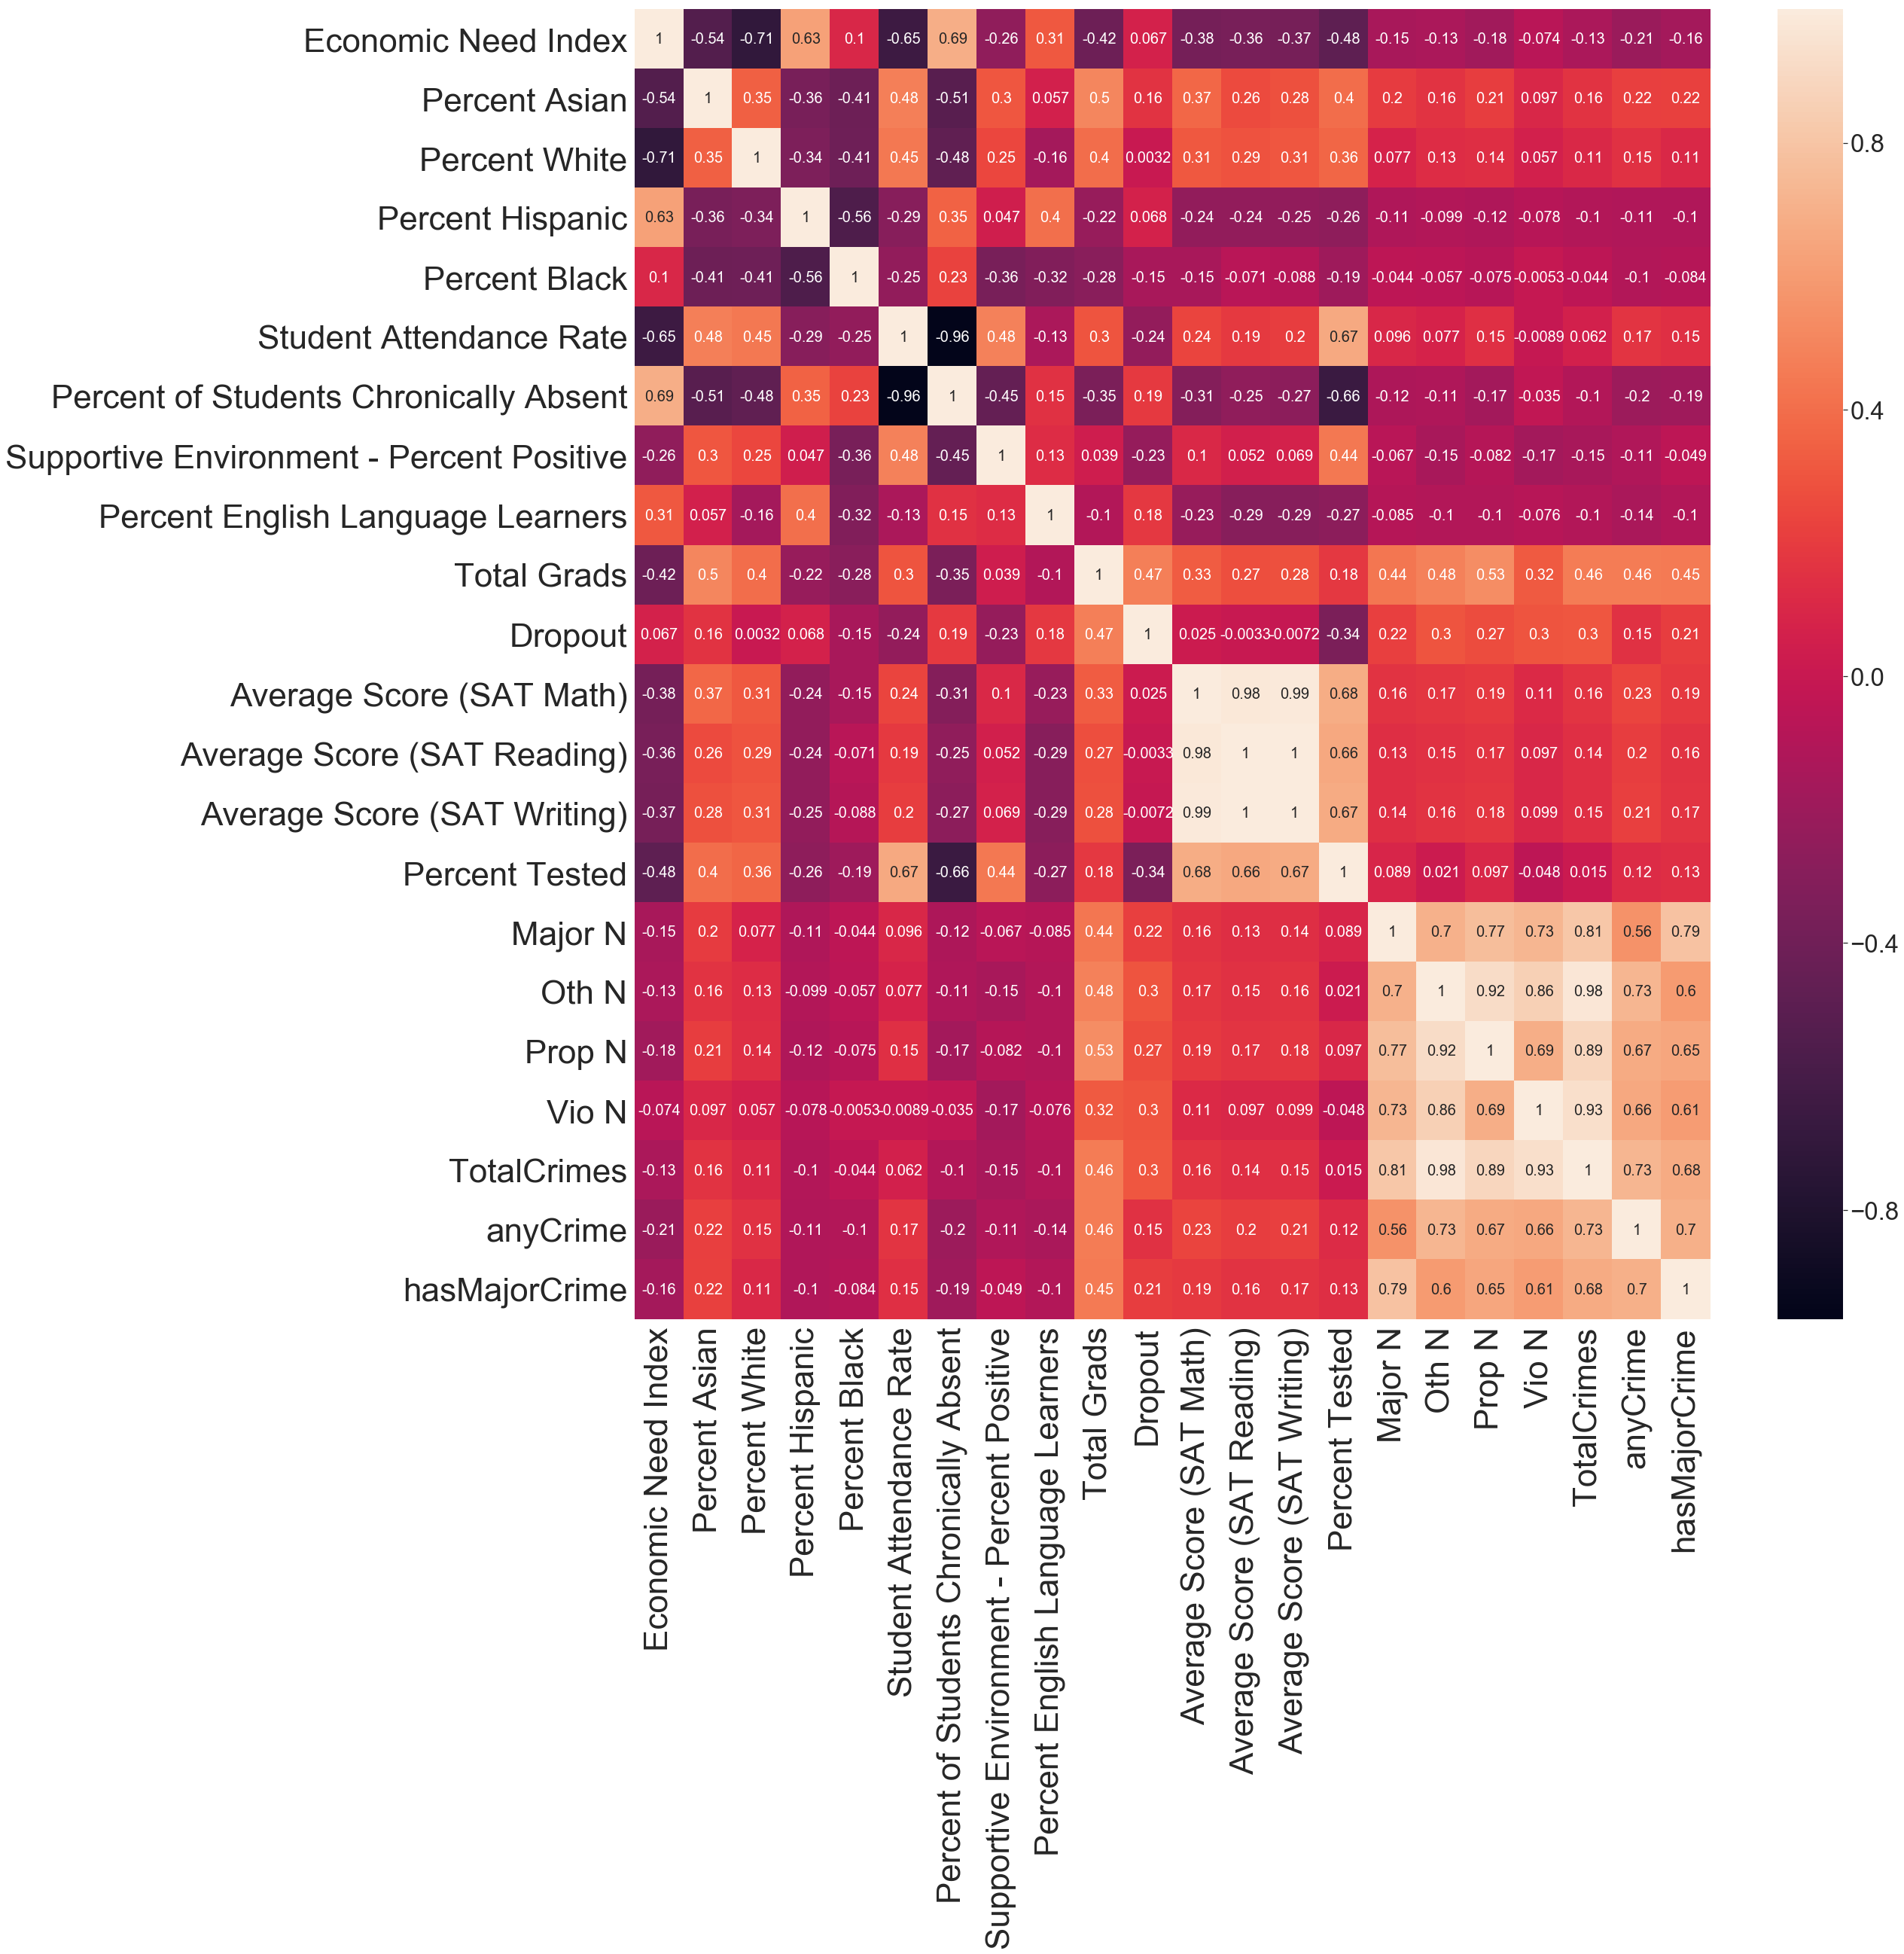

In [0]:
#Plotting the actual correlation matrix
fig, ax = plt.subplots(figsize=(32, 32))
sns.set(font_scale=3)
sns.heatmap(correlation, xticklabels = Index, yticklabels = Col, annot = True, annot_kws={'size':20}, ax = ax)
heat_map=plt.gcf()

<h3> As we can see from the correlation heatmap created, the top 5 variables with the highest correlation
    (negative or positive) with Total Crimes are: 1) 

<h2>Building Logistic Regression Model to Find Key Influencers of Crimes</h2>

In [0]:
numCrimeData.columns

Index(['Economic Need Index', 'Percent Asian', 'Percent White',
       'Percent Hispanic', 'Percent Black', 'Student Attendance Rate',
       'Percent of Students Chronically Absent',
       'Supportive Environment - Percent Positive',
       'Percent English Language Learners', 'Total Grads', 'Dropout',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Major N', 'Oth N',
       'Prop N', 'Vio N', 'TotalCrimes'],
      dtype='object')

In [0]:
numCrimeData.info

<bound method DataFrame.info of      Economic Need Index  Percent Asian  Percent White  Percent Hispanic  \
0                  0.832          0.132          0.039             0.566   
1                  0.812          0.299          0.033             0.411   
2                  0.610          0.094          0.083             0.579   
3                  0.767          0.058          0.025             0.512   
4                  0.257          0.385          0.286             0.180   
5                  0.314          0.171          0.453             0.187   
6                  0.713          0.057          0.026             0.622   
7                  0.714          0.036          0.088             0.611   
8                  0.687          0.047          0.030             0.522   
9                  0.633          0.059          0.117             0.413   
10                 0.751          0.050          0.017             0.712   
11                 0.665          0.137          0.019  

In [0]:
#creating column with binary variable for whether there was any crime
numCrimeData['anyCrime'] = np.where(numCrimeData['TotalCrimes']>1, 1, 0)  

In [0]:
numCrimeData.head

<bound method NDFrame.head of      Economic Need Index  Percent Asian  Percent White  Percent Hispanic  \
0                  0.832          0.132          0.039             0.566   
1                  0.812          0.299          0.033             0.411   
2                  0.610          0.094          0.083             0.579   
3                  0.767          0.058          0.025             0.512   
4                  0.257          0.385          0.286             0.180   
5                  0.314          0.171          0.453             0.187   
6                  0.713          0.057          0.026             0.622   
7                  0.714          0.036          0.088             0.611   
8                  0.687          0.047          0.030             0.522   
9                  0.633          0.059          0.117             0.413   
10                 0.751          0.050          0.017             0.712   
11                 0.665          0.137          0.019    

In [0]:
#creating column with binary variable for whether there was any major
numCrimeData['hasMajorCrime'] = np.where(numCrimeData['Major N']>0, 1, 0)


In [0]:
numCrimeData.head

<bound method NDFrame.head of      Economic Need Index  Percent Asian  Percent White  Percent Hispanic  \
0                  0.832          0.132          0.039             0.566   
1                  0.812          0.299          0.033             0.411   
2                  0.610          0.094          0.083             0.579   
3                  0.767          0.058          0.025             0.512   
4                  0.257          0.385          0.286             0.180   
5                  0.314          0.171          0.453             0.187   
6                  0.713          0.057          0.026             0.622   
7                  0.714          0.036          0.088             0.611   
8                  0.687          0.047          0.030             0.522   
9                  0.633          0.059          0.117             0.413   
10                 0.751          0.050          0.017             0.712   
11                 0.665          0.137          0.019    

In [0]:
numCrimeData.shape

(410, 22)

In [0]:
numCrimeData.columns

Index(['Economic Need Index', 'Percent Asian', 'Percent White',
       'Percent Hispanic', 'Percent Black', 'Student Attendance Rate',
       'Percent of Students Chronically Absent',
       'Supportive Environment - Percent Positive',
       'Percent English Language Learners', 'Total Grads', 'Dropout',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Major N', 'Oth N',
       'Prop N', 'Vio N', 'TotalCrimes', 'anyCrime', 'hasMajorCrime'],
      dtype='object')

In [0]:
modelData = numCrimeData.copy()

In [0]:
modelData = modelData.dropna()

In [0]:
modelData.columns

Index(['Economic Need Index', 'Percent Asian', 'Percent White',
       'Percent Hispanic', 'Percent Black', 'Student Attendance Rate',
       'Percent of Students Chronically Absent',
       'Supportive Environment - Percent Positive',
       'Percent English Language Learners', 'Total Grads', 'Dropout',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Major N', 'Oth N',
       'Prop N', 'Vio N', 'TotalCrimes', 'anyCrime', 'hasMajorCrime'],
      dtype='object')

In [0]:
model1Data = modelData.drop(columns = ['Percent Asian', 'Percent White', 'Percent Hispanic', 'Percent Black', 
                                     'Percent of Students Chronically Absent', 
                                     'Average Score (SAT Math)', 'Average Score (SAT Reading)',
                                     'Average Score (SAT Writing)', 'Major N', 'Oth N', 'Prop N', 'Vio N', 
                                      'TotalCrimes', 'hasMajorCrime'])

In [0]:
model1Data.columns

Index(['Economic Need Index', 'Student Attendance Rate',
       'Supportive Environment - Percent Positive',
       'Percent English Language Learners', 'Total Grads', 'Dropout',
       'Percent Tested', 'anyCrime'],
      dtype='object')

In [0]:
model2Data = modelData.drop(columns = ['Percent Asian', 'Percent White', 'Percent Hispanic', 'Percent Black', 
                                     'Percent of Students Chronically Absent', 
                                     'Average Score (SAT Math)', 'Average Score (SAT Reading)',
                                     'Average Score (SAT Writing)', 'Major N', 'Oth N', 'Prop N', 'Vio N', 
                                      'TotalCrimes', 'anyCrime'])

In [0]:
model2Data.columns

Index(['Economic Need Index', 'Student Attendance Rate',
       'Supportive Environment - Percent Positive',
       'Percent English Language Learners', 'Total Grads', 'Dropout',
       'Percent Tested', 'hasMajorCrime'],
      dtype='object')

<h2> Running Logistic Regression Model to Predict if a School has Any Crime </h2>

<h2> Important Note </h2>
<p> Important Notes: Binary Logistic Regression requires that all Independent Variables are completely independent of each other. In other words, there should be little or no multi-collinearity. Given the many possible confounding variables in the Education Industry, it is unlikely that all of the independent features choses are completely independent. For example: Economic Need Index is likely to be higher at schools with a lower Student Attendance Rate.
    
The other major caveat we want to call out is the fact that Logistic Regression usually requires the sample data set to be quite large. However, there are only 410 public schools in New York, and even fewer public schools with reported crimes or major crimes. Thus this model is built on a fairly small sample of data </p>

In [0]:
#split dataset in features and target variable
feature_cols = ['Economic Need Index', 'Student Attendance Rate', 'Supportive Environment - Percent Positive', 
                'Percent English Language Learners','Total Grads','Dropout','Percent Tested']
X = model1Data[feature_cols] # Features
y = model1Data.anyCrime # Target variable

<h4> Splitting Data into Testing & Training Sets </h4>

In [0]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [0]:
print (X_train)

     Economic Need Index  Student Attendance Rate  \
222                0.539                    0.881   
400                0.397                    0.909   
245                0.748                    0.855   
24                 0.330                    0.944   
241                0.710                    0.867   
264                0.626                    0.880   
237                0.635                    0.846   
326                0.410                    0.924   
331                0.443                    0.942   
73                 0.786                    0.796   
164                0.766                    0.851   
14                 0.749                    0.859   
113                0.853                    0.864   
398                0.616                    0.864   
210                0.782                    0.792   
335                0.573                    0.824   
255                0.642                    0.874   
19                 0.715                    0.

<h4>Building Logistic Regression Model</h4>

In [0]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/Users/anirbanpoddar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<h4> Evaluating Model with Confusion Matrix </h4>

In [0]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[79,  1],
       [11,  4]])

Text(0.5, 257.44, 'Predicted label')

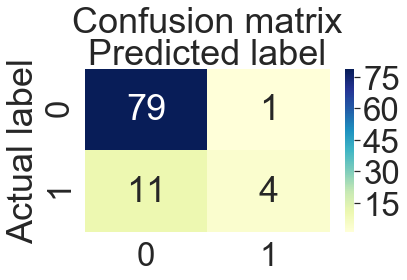

In [0]:
class_names=['No Crime','Some Crime'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8736842105263158
Precision: 0.8
Recall: 0.26666666666666666


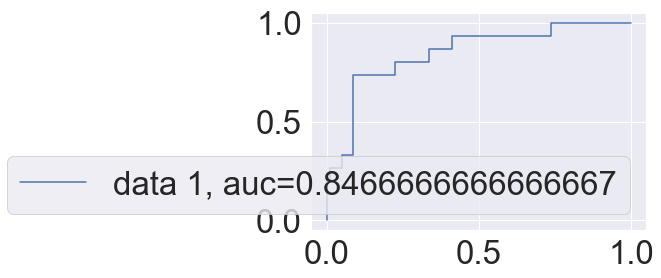

In [0]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h3> Finding Coefficients for Model Predicting Any Crime at a High School </h3>

In [0]:
coeff = logreg.coef_
print(coeff)

[[-0.35828093 -0.74742279 -1.11230102 -0.98160585  0.00380811  0.00945582
   0.25161062]]


<h3>As we can see, the independent variables sorted by the most impact on the prediction model to the least, are:
    1) Supportive Environment - Percent Positive Recorded by Students 2) Percent English Language Learners 3) Student Attendance Rate</h3>

<h2> Running Logistic Regression Model to Predict if a School has a Major Crime </h2>

In [0]:
#split dataset in features and target variable
feature_cols2 = ['Economic Need Index', 'Student Attendance Rate', 'Supportive Environment - Percent Positive', 
                'Percent English Language Learners','Total Grads','Dropout','Percent Tested']
X2 = model2Data[feature_cols] # Features
y2 = model2Data.hasMajorCrime # Target variable

X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.25,random_state=0)

In [0]:

# instantiate the model (using the default parameters)
logreg2 = LogisticRegression()

# fit the model with data
logreg2.fit(X_train,y_train)

#
y_pred=logreg2.predict(X_test)

/Users/anirbanpoddar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 257.44, 'Predicted label')

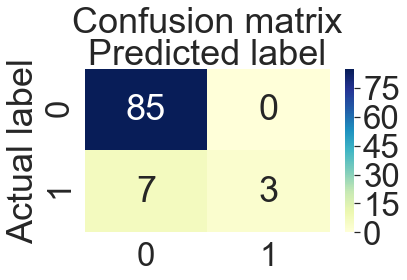

In [0]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=['No Major Crime','Major Crime'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9263157894736842
Precision: 1.0
Recall: 0.3


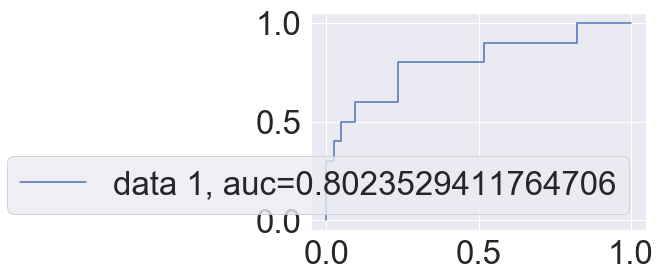

In [0]:
y_pred_proba = logreg2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h3> Finding Coefficients for Model Predicting Major Crimes at High Schools</h3>

In [0]:
coeff2 = logreg2.coef_
print(coeff2)

[[-0.35828093 -0.74742279 -1.11230102 -0.98160585  0.00380811  0.00945582
   0.25161062]]


<h3>The factors impacting major crimes are the same as those impacting the prediction of any crime</h3>